## Predicting the Sale Price of Bulldozers using Machine Learning

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?
* **Inputs:** Bulldozer characteristics such as make year, base model, model series, state of sale (e.g. which US state was it sold in), drive system and more.
* **Outputs:** Bulldozer sale price (in USD).

Steps: 
* Since we're trying to predict a number, this kind of problem is known as a **regression problem**. 
* Since we're going to predicting results with a time component (predicting future sales based on past sales), this is also known as a **time series** or **forecasting** problem.
* Data  [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data)
  There are 3 datasets:

1. **Train.csv** - sales examples up to 2011.
2. **Valid.csv** - sales examples from January 1 2012 to April 30 2012
3. **Test.csv** - sales examples from May 1 2012 to November 2012
 
* Evaluation matric to being root mean squared log error (RMSLE). As with many regression evaluations.
* Data Dictionary
| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable | 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [89]:
df = pd.read_csv("TrainAndValid.csv", parse_dates=['saledate'])
df.head()

C:\Users\dilen\AppData\Local\Temp\ipykernel_22208\2043415552.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TrainAndValid.csv", parse_dates=['saledate'])


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 960A-BA69

 Directory of C:\Users\dilen\python_projects\Time_Series\bluebook-for-bulldozers\data\bluebook-for-bulldozers

23/03/2025  17:10    <DIR>          .
23/03/2025  14:27    <DIR>          ..
13/02/2025  13:29    <DIR>          .ipynb_checkpoints
10/02/2025  13:39            11,063 Data Dictionary.xlsx
23/03/2025  14:52           671,639 end-to-end-bluebook-bulldozer-price-regression-v1.ipynb
10/02/2025  13:39        51,498,702 Machine_Appendix.csv
10/02/2025  13:39           196,760 median_benchmark.csv
13/02/2025  18:16           341,589 predictions_my.csv
10/02/2025  13:39           211,941 random_forest_benchmark_test.csv
10/02/2025  13:39         3,560,907 Test.csv
10/02/2025  13:39           329,692 test_predictions.csv
23/03/2025  17:10           591,450 TimeSeries.ipynb
10/02/2025  13:39         7,183,499 Train.7z
10/02/2025  13:39       116,403,970 Train.csv
10/02/2025  13:39         9,732,240 Train.zip
10/02/2025  20:03

In [91]:
df.info() #When Dtype is object, it's saying that it's a string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [92]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [93]:
df["saledate"].dtype

dtype('<M8[ns]')

In [94]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [95]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [96]:
#ax.scatter??

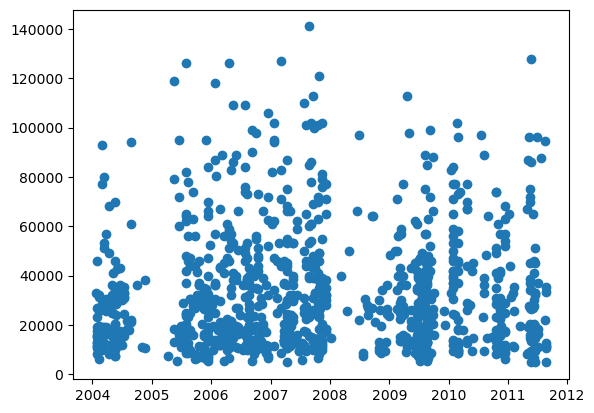

In [97]:
fig, ax = plt.subplots()
#ax.scatter??
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: >

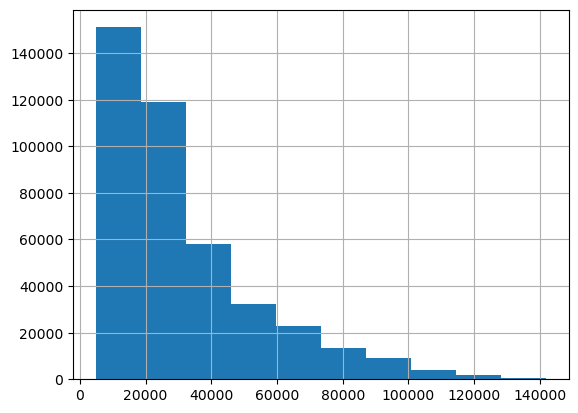

In [98]:
df["SalePrice"].hist()

In [99]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [100]:
df = pd.read_csv("TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [101]:
df["saledate"][:1000]


0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

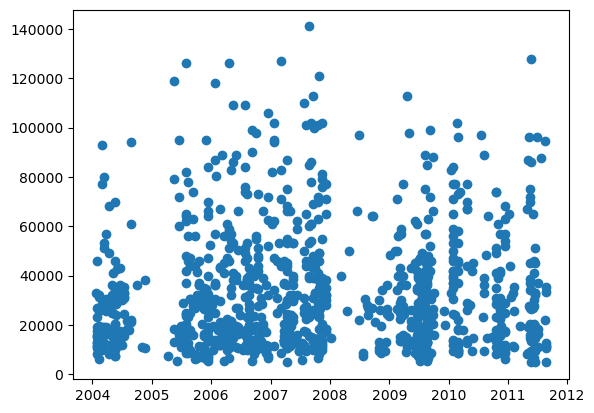

In [102]:
fig, ax = plt.subplots()
#ax.scatter??
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [103]:
df["saledate"].dtype #datetime64[ns] is equalient to M8[ns]

dtype('<M8[ns]')

In [104]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [106]:
# Sort dataframe by salesdate.sorting our DataFrame by date has the added benefit of making sure our data is sequential.
df.sort_values(by=["saledate"], inplace=True, ascending=True)

In [107]:
df.head(20) # the first row has index of 205615

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# keep original data frame copy
df_tmp = df.copy()

In [109]:
df_tmp.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [111]:
  df_tmp.saledate, df_tmp.saledate.dt.year

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
             ...    
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, Length: 412698, dtype: datetime64[ns],
 205615    1989
 274835    1989
 141296    1989
 212552    1989
 62755     1989
           ... 
 410879    2012
 412476    2012
 411927    2012
 407124    2012
 409203    2012
 Name: saledate, Length: 412698, dtype: int32)

In [112]:
# Feature Engineering
df_tmp["saleYear"] = df_tmp.saledate.dt.year

In [113]:
df_tmp["saleYear"] .head(20)

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
54653     1989
81383     1989
204924    1989
135376    1989
113390    1989
113394    1989
116419    1989
32138     1989
127610    1989
76171     1989
127000    1989
128130    1989
127626    1989
55455     1989
55454     1989
Name: saleYear, dtype: int32

In [114]:
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear

In [115]:
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofWeek", "saleDayofYear"]].head(20)

,SalePrice,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31
54653,23500.0,1989,1,31,1,31
81383,31000.0,1989,1,31,1,31
204924,11750.0,1989,1,31,1,31
135376,63000.0,1989,1,31,1,31
113390,13000.0,1989,1,31,1,31


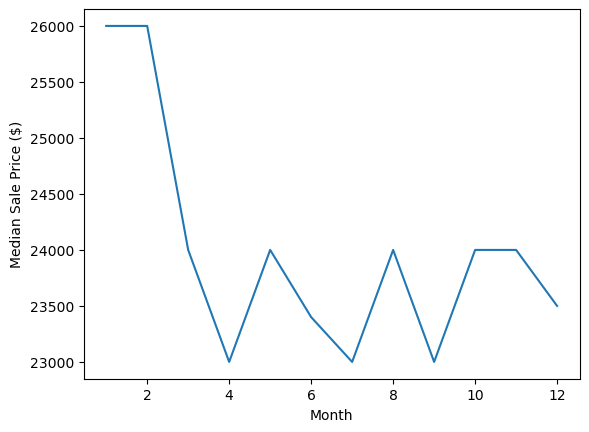

In [116]:
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

It looks like the median sale prices of January and February (months 1 and 2) are quite a bit higher than the other months of the year.

In [117]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [118]:
# Exploratory Analysis
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [119]:
df_tmp.groupby(["state"])["SalePrice"].median()

state
Alabama           28000.0
Alaska            26000.0
Arizona           23000.0
Arkansas          22500.0
California        22500.0
Colorado          25000.0
Connecticut       23500.0
Delaware          23000.0
Florida           27000.0
Georgia           24000.0
Hawaii            26000.0
Idaho             21000.0
Illinois          22500.0
Indiana           19000.0
Iowa              24000.0
Kansas            20000.0
Kentucky          22000.0
Louisiana         23500.0
Maine             19500.0
Maryland          22000.0
Massachusetts     23000.0
Michigan          22000.0
Minnesota         19500.0
Mississippi       25000.0
Missouri          22000.0
Montana           24000.0
Nebraska          24250.0
Nevada            27000.0
New Hampshire     23000.0
New Jersey        24500.0
New Mexico        26000.0
New York          20000.0
North Carolina    25000.0
North Dakota      29750.0
Ohio              22000.0
Oklahoma          24000.0
Oregon            23000.0
Pennsylvania      19000.0
Puerto

In [120]:
# Modelling
#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor(n_jobs=-1, random_state=42)# random_state act as random seed
#model.fit(df_tmp.drop("SalePrice", axis=1),df_tmp["SalePrice"])

In [121]:
# The data is not in numeric formt
# the data has null values
# One way to convert sting to numbers is by converting them to pandas categories
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [122]:
for label, columns_content in df_tmp.items():  # 
    if pd.api.types.is_string_dtype(columns_content):
       print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [123]:
df_tmp.items()

<generator object DataFrame.items at 0x0000015A0E50F4C0>

In [124]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [125]:
pd.api.types.is_string_dtype(df_tmp["ProductGroupDesc"])

True

In [126]:
random_dist = { "key1": "hello", "key2": "world" }
for key, value in random_dist.items():  # 
  print(key, value)
    

key1 hello
key2 world


In [127]:
type(random_dist)

dict

In [128]:
for label, columns_content in df_tmp.items():  # 
    if pd.api.types.is_object_dtype(columns_content):
       df_tmp[label]  = columns_content.astype("category").cat.as_ordered()
    

In [129]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [130]:
type(df["Enclosure"])

pandas.core.series.Series

In [131]:
df["Enclosure"][:10]

205615    OROPS
274835    OROPS
141296    OROPS
212552    EROPS
62755     OROPS
54653     OROPS
81383     EROPS
204924    OROPS
135376    EROPS
113390    OROPS
Name: Enclosure, dtype: object

In [132]:
for label, columns_content in df_tmp.items():  # 
    if pd.api.types.is_string_dtype(columns_content):
       print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [133]:
!pip install pyarrow

In [134]:
!pip install fastparquet

In [135]:
df_tmp['fiModelSeries']

205615    NaN
274835    NaN
141296    NaN
212552    NaN
62755     NaN
         ... 
410879    NaN
412476    NaN
411927    NaN
407124    NaN
409203    NaN
Name: fiModelSeries, Length: 412698, dtype: category
Categories (123, object): [' III' < '#NAME?' < '-1' < '-1.50E+01' ... 'XT' < 'ZHS' < 'ZTS' < 'ZX']

In [136]:
df_tmp['fiModelSeries'] = df_tmp['fiModelSeries'].astype(str).str.strip()

In [137]:
# To save to parquet format requires pyarrow or fastparquet (or both)
# Can install via `pip install pyarrow fastparquet`
df_tmp.to_parquet(path="./TrainAndValid_object_values_as_categories.parquet", 
                  engine="auto") # "auto" will automatically use pyarrow or fastparquet, defaulting to pyarrow first

* convert string data types into categories

In [138]:

# Read in df_tmp from parquet format
df_tmp_reload = pd.read_parquet(path="TrainAndValid_object_values_as_categories.parquet",
                         engine="auto")

# Using parquet format, datatypes are preserved
df_tmp_reload.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             412698 non-null  object  
 13  fiModelDescriptor         748

In [139]:
#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor(n_jobs=-1, random_state=42)# random_state act as random seed
#model.fit(df_tmp.drop("SalePrice", axis=1),df_tmp["SalePrice"])

In [140]:
df["fiBaseModel"][:10]

205615    TD20
274835     A66
141296      D7
212552     A62
62755       D3
54653       D6
81383     IT12
204924     544
135376      D5
113390      12
Name: fiBaseModel, dtype: object

In [141]:
df_tmp["fiBaseModel"][:10]

205615    TD20
274835     A66
141296      D7
212552     A62
62755       D3
54653       D6
81383     IT12
204924     544
135376      D5
113390      12
Name: fiBaseModel, dtype: category
Categories (1961, object): ['10' < '100' < '104' < '1066' ... 'ZX75' < 'ZX80' < 'ZX800' < 'ZX850']

In [142]:
df_tmp.fiBaseModel.cat.codes

205615    1743
274835     558
141296     712
212552     557
62755      682
          ... 
410879     689
412476      83
411927     202
407124      18
409203     306
Length: 412698, dtype: int16

In [143]:
df_tmp_2 = pd.DataFrame({
    "Category": ["Low", "Medium", "High", "Low"],
    "Product": ["A", "B", "C", "A"]
})

print(df_tmp_2.dtypes)

Category    object
Product     object
dtype: object


In [144]:
for label, columns_content in df_tmp_2.items():
    if pd.api.types.is_string_dtype(columns_content):
        df_tmp_2[label] = columns_content.astype("category").cat.as_ordered()

print(df_tmp_2.dtypes)

Category    category
Product     category
dtype: object


In [145]:
df_tmp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Category  4 non-null      category
 1   Product   4 non-null      category
dtypes: category(2)
memory usage: 404.0 bytes


In [146]:
df_tmp_2["Category"].cat.codes

0    1
1    2
2    0
3    1
dtype: int8

In [147]:
df_tmp_2["Category"].cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [148]:
#df_tmp.to_csv("train_tmp_1.csv", index=False)

In [149]:
#df_tmp_reload = pd.read_csv("train_tmp_1.csv", low_memory=False)

In [150]:
df_tmp.head(10).info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 205615 to 113390
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   10 non-null     int64   
 1   SalePrice                 10 non-null     float64 
 2   MachineID                 10 non-null     int64   
 3   ModelID                   10 non-null     int64   
 4   datasource                10 non-null     int64   
 5   auctioneerID              10 non-null     float64 
 6   YearMade                  10 non-null     int64   
 7   MachineHoursCurrentMeter  0 non-null      float64 
 8   UsageBand                 0 non-null      category
 9   fiModelDesc               10 non-null     category
 10  fiBaseModel               10 non-null     category
 11  fiSecondaryDesc           5 non-null      category
 12  fiModelSeries             10 non-null     object  
 13  fiModelDescriptor         0 non-null      catego

In [151]:
df_tmp_reload.head(10).info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 205615 to 113390
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   10 non-null     int64   
 1   SalePrice                 10 non-null     float64 
 2   MachineID                 10 non-null     int64   
 3   ModelID                   10 non-null     int64   
 4   datasource                10 non-null     int64   
 5   auctioneerID              10 non-null     float64 
 6   YearMade                  10 non-null     int64   
 7   MachineHoursCurrentMeter  0 non-null      float64 
 8   UsageBand                 0 non-null      category
 9   fiModelDesc               10 non-null     category
 10  fiBaseModel               10 non-null     category
 11  fiSecondaryDesc           5 non-null      category
 12  fiModelSeries             10 non-null     object  
 13  fiModelDescriptor         0 non-null      catego

In [152]:
for label, columns_content in df_tmp_reload.items():  # 
    if pd.api.types.is_string_dtype(columns_content):
       print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [153]:
df_tmp_reload[label]

205615     17
274835     31
141296     31
212552     31
62755      31
         ... 
410879    119
412476    119
411927    119
407124    119
409203    119
Name: saleDayofYear, Length: 412698, dtype: int32

In [154]:
df_tmp_reload.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries                    0
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [155]:
df_tmp_reload["fiBaseModel"].cat.codes

205615    1743
274835     558
141296     712
212552     557
62755      682
          ... 
410879     689
412476      83
411927     202
407124      18
409203     306
Length: 412698, dtype: int16

In [156]:
for label, columns_content in df_tmp_reload.items():  # 
    if pd.api.types.is_numeric_dtype(columns_content):
       print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [157]:
for label, columns_content in df_tmp_reload.items():  # 
    if pd.api.types.is_numeric_dtype(columns_content):
       if pd.isnull(columns_content).sum():
           print(label)

auctioneerID
MachineHoursCurrentMeter


In [158]:
# fill numeric null values
for label, columns_content in df_tmp_reload.items():  # 
    if pd.api.types.is_numeric_dtype(columns_content):
       if pd.isnull(columns_content).sum():
          df_tmp_reload[label+"_is_missing"] = pd.isnull(columns_content).astype(int)
          df_tmp_reload[label] = columns_content.fillna(columns_content.median()) # mean can sensitive to outliers
        

In [159]:
for label, columns_content in df_tmp_reload.items():  # 
    if pd.api.types.is_numeric_dtype(columns_content):
       if pd.isnull(columns_content).sum():
           print(label)

In [160]:
df_tmp_reload["auctioneerID_is_missing"][:10]

205615    0
274835    0
141296    0
212552    0
62755     0
54653     0
81383     0
204924    0
135376    0
113390    0
Name: auctioneerID_is_missing, dtype: int64

In [161]:
df_tmp_reload.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                               0
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [162]:
df_tmp_reload.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

In [163]:
# Filling missing categorical values 
for label, column_content in df_tmp_reload.items():
   if not pd.api.types.is_numeric_dtype(column_content):
       print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [164]:
df_tmp_reload.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

In [165]:
pd.Categorical(df_tmp_reload["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True, categories_dtype=object)

In [166]:
pd.Categorical(df_tmp_reload["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [167]:
pd.Categorical(df_tmp_reload["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], shape=(412698,), dtype=int8)

In [168]:
category_dict = {} 
for label, columns_content in df_tmp_reload.items():
   if not pd.api.types.is_numeric_dtype(columns_content):
       df_tmp_reload[label+"_is_missing"] = pd.isnull(columns_content).astype(int)
       df_tmp_reload[label] = pd.Categorical(columns_content).codes +1 # there is -1, categorical assign -1
       category_dict[label] = dict(zip(pd.Categorical(columns_content).codes +1, pd.Categorical(columns_content)))

In [170]:
for key, value in sorted(category_dict["UsageBand"].items()):
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


In [171]:
pd.Categorical(df_tmp_reload["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

In [172]:
df_tmp_reload.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: float64(3), int16(4), int32(5), int64(51), int8(40)
memory usage: 199.9 MB


In [173]:
df_tmp_reload.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,1,1,1,1,0,0,0,1,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,1,1,1,1,1,1,1,1,0,0
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,1,1,1,1,0,0,0,1,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,1,1,1,1,1,1,1,1,0,0
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,1,1,1,1,0,0,0,1,1


In [174]:
df_tmp_reload.isna().sum()[:100]

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Thumb_is_missing               0
Pattern_Changer_is_missing     0
Grouser_Type_is_missing        0
Backhoe_Mounting_is_missing    0
Blade_Type_is_missing          0
Length: 100, dtype: int64

In [175]:
df_tmp_reload.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [176]:
df_tmp_reload.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,1,1,1,1,0,0,0,1,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,1,1,1,1,1,1,1,1,0,0
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,1,1,1,1,0,0,0,1,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,1,1,1,1,1,1,1,1,0,0
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,1,1,1,1,0,0,0,1,1


In [177]:
df_tmp_reload.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: float64(3), int16(4), int32(5), int64(51), int8(40)
memory usage: 199.9 MB


In [178]:
for label, columns_content in df_tmp_reload.items():
    if isinstance(columns_content.dtype, pd.CategoricalDtype):  
        print(label)  # Print categorical column name


In [181]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42)# random_state act as random seed, n_jobs -1 is use all cores
model.fit(df_tmp_reload.drop("SalePrice", axis=1),df_tmp_reload["SalePrice"])

CPU times: total: 19min 33s
Wall time: 1min 8s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [182]:
model.score(df_tmp_reload.drop("SalePrice", axis=1), df_tmp_reload["SalePrice"]) # This is R2 (coefitient of determination) not RMSLE

0.9875108511786522

In [183]:
df_tmp_reload.saleYear.value_counts()


saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 

In [184]:
#Split data train and validation set
df_vali = df_tmp_reload[df_tmp_reload.saleYear ==2012]
df_train = df_tmp_reload[df_tmp_reload.saleYear !=2012]

len(df_vali), len(df_train)


(11573, 401125)

In [185]:
X_train, Y_train = df_train.drop("SalePrice", axis=1),df_train.SalePrice
X_vali, Y_vali = df_vali.drop("SalePrice", axis=1),df_vali.SalePrice

In [186]:
X_train.shape, Y_train.shape, X_vali.shape, Y_vali.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [187]:
Y_train.head()

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
Name: SalePrice, dtype: float64

What's wrong with splitting data after filling it?
So if our validation set is supposed to be representative of the future and we’re filling our training data using information from the validation set,

Encode/transform all categorical variables of your data (on the entire dataset, this ensures categorical variables are encoded the same across training/test sets, make sure the training and test sets have the same column names).

Split  data (into train/test).

Fill the training set and test set numerical values separately.

Don’t use numerical data from the future (test set) to fill data from the past (training set).


In [188]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(ytest,y_pred):
    return np.sqrt(mean_squared_log_error(ytest,y_pred))

In [189]:
def show_score(model):
    train_predict = model.predict(X_train)
    vali_predict = model.predict(X_vali)
    scores = {
        "Training MAE": mean_absolute_error(Y_train, train_predict),
        "Validation MAE": mean_absolute_error(Y_vali, vali_predict),
        "Training RMSLE": rmsle(Y_train, train_predict),
        "Validation RMSLE": rmsle(Y_vali, vali_predict),
        "Training R^2": r2_score(Y_train, train_predict),
        "Validation R^2": r2_score(Y_vali, vali_predict)}
    return scores
 


In [190]:
%%time
# Testing the model with subset of data

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)# random_state act as random seed, n_jobs -1 is use all cores
model.fit(X_train,Y_train)

CPU times: total: 32.3 s
Wall time: 2.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [193]:
X_train.shape[0] * 100 # number of data RandomForestRegressor is running, the default number of forests= extimators is 100

40112500

In [192]:
show_score(model)

{'Training MAE': 5564.818110838268,
 'Validation MAE': 7156.34559923961,
 'Training RMSLE': np.float64(0.25790945175599367),
 'Validation RMSLE': np.float64(0.29301133025722453),
 'Training R^2': 0.860472302793338,
 'Validation R^2': 0.832318271061832}

In [194]:
%%time
# Find different hyper parameters
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 3min 54s
Wall time: 3min 56s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [200]:
rs_model.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(7),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [201]:
# Train the model with beast hyperparameters
ideal_model = RandomForestRegressor(
n_estimators = np.int64(50),
 min_samples_split= np.int64(12),
 min_samples_leaf= np.int64(1),
 max_samples= None,
 max_features= 1.0,
 max_depth= None, n_jobs=-1, random_state=42)# random_state act as random seed, n_jobs -1 is use all cores
ideal_model.fit(X_train,Y_train)

RandomForestRegressor(min_samples_leaf=np.int64(1),
                      min_samples_split=np.int64(12), n_estimators=np.int64(50),
                      n_jobs=-1, random_state=42)

In [202]:
show_score(ideal_model)

{'Training MAE': 2667.1221483752965,
 'Validation MAE': 6144.970622258228,
 'Training RMSLE': np.float64(0.13298109529324237),
 'Validation RMSLE': np.float64(0.25497763349770197),
 'Training R^2': 0.9653158716266054,
 'Validation R^2': 0.8712864714808927}

In [203]:
# Predictions on test data
df_test = pd.read_csv('Test.csv', low_memory=False,
                      parse_dates=['saledate'])

In [ ]:
#test_preds = ideal_model.predict(df_test) # need pre processing

In [204]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

 The order of columns that were fit on should match the order of columns that are predicted on.

In [205]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [206]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [207]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [208]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [209]:
test_preds = ideal_model.predict(df_test) # This didnot affect True False

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [210]:
df_test = df_test[X_train.columns]

In [211]:
test_preds = ideal_model.predict(df_test)

In [212]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20954.138384
1,1227844,28217.686567
2,1227847,50689.455668
3,1227848,86252.766316
4,1227863,55390.929907
...,...,...
12452,6643171,52429.344336
12453,6643173,11065.091268
12454,6643184,11328.264172
12455,6643186,17538.952978


In [213]:
df_preds.to_csv("predictions_my.csv",
               index=False)

In [214]:
# Feature Importance
ideal_model.feature_importances_

array([4.74820895e-02, 1.28986920e-02, 3.27772426e-02, 2.06632316e-04,
       3.33642132e-03, 2.69172976e-01, 2.62613469e-03, 8.91832245e-04,
       1.97717927e-02, 8.23559427e-02, 5.31136325e-02, 3.43875309e-03,
       3.75838770e-03, 2.34855030e-01, 4.07259150e-02, 6.60659940e-03,
       1.80270153e-04, 2.12842270e-04, 1.73298376e-03, 8.39551025e-03,
       3.24642911e-04, 3.33078093e-05, 4.91130336e-04, 1.55263187e-04,
       1.52653225e-03, 2.13222222e-05, 3.00462805e-05, 5.23130946e-03,
       4.70666091e-04, 4.63135207e-05, 2.66382427e-03, 3.54536635e-03,
       2.06461627e-03, 2.63903676e-03, 1.96470670e-04, 1.35700954e-03,
       7.51570656e-04, 1.30060841e-02, 5.72381983e-06, 1.02039589e-05,
       2.04590674e-04, 9.60986810e-04, 1.01686433e-03, 5.91158727e-04,
       1.81007272e-04, 3.58099336e-04, 1.85942483e-04, 1.42475864e-03,
       9.44352642e-04, 1.26494379e-04, 1.47477499e-04, 7.75675753e-02,
       1.94705550e-03, 6.40517885e-03, 3.04682079e-03, 1.24877687e-02,
      

In [215]:
len(ideal_model.feature_importances_)

102

In [216]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dilen\python_projects\Time_Series\bluebook-for-bulldozers\.env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       haa95532_0         130 KB
    openssl-3.0.16             |       h3f729d1_0         7.8 MB
    seaborn-0.13.2             |  py312haa95532_2         723 KB
    ------------------------------------------------------------
                                           Total:         8.6 MB

The following packages will be UPDATED:

  ca-certificates                     2024.12.31-haa95532_0 --> 2025.2.25-haa95532_0 
  openssl                                 3.0.15-h827c3e9_0 --> 3.0.16-h3f729d1_0 
  seaborn                            0.13.2-py312haa95532

In [217]:
import matplotlib.pyplot as plt
def plot_features(columns, importances, n=20):  #pandas chaining
    df = (pd.DataFrame({"features": columns,
                        "features_importances": importances})
          .sort_values("features_importances", ascending=False)
          .reset_index(drop=True)
          .head(n)) 
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df["features"], df["features_importances"], color="skyblue")
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.set_title("Top Feature Importances")
    ax.invert_yaxis()
    plt.show()

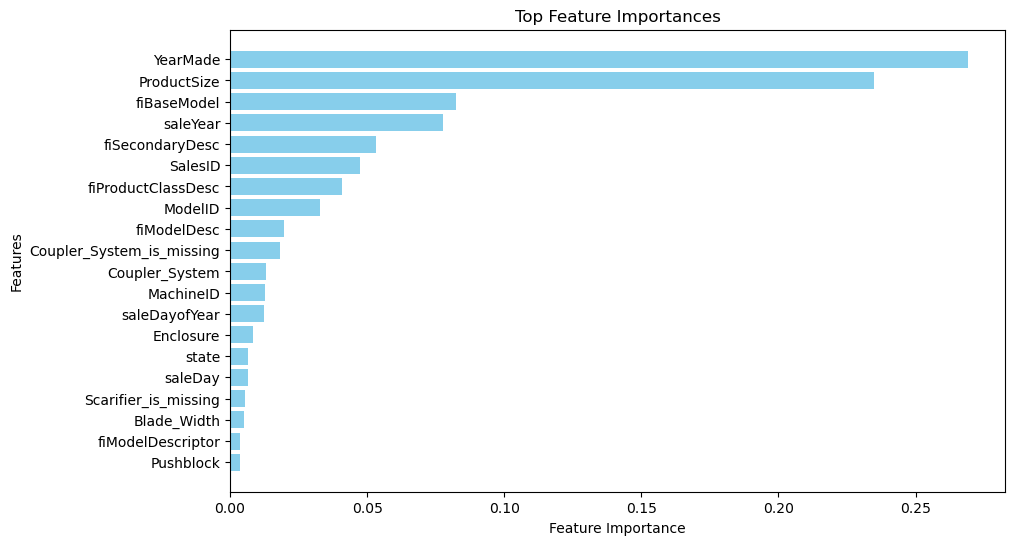

In [218]:
plot_features(X_train.columns, ideal_model.feature_importances_)